In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Task 1

In [2]:
data=pd.read_csv('DS2_C6_S3_CarSales_Data_Practice.csv')
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [4]:
car_df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [3]:
data.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
sf=LabelEncoder()

In [9]:
data['Manufacturer']=sf.fit_transform(data['Manufacturer'])
data['Model']=sf.fit_transform(data['Model'])
data['Vehicle_type']=sf.fit_transform(data['Vehicle_type'])
data['Latest_Launch']=sf.fit_transform(data['Latest_Launch'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    int64  
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [7]:
data.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [10]:
data.drop(columns=['__year_resale_value'],inplace=True)

In [3]:
data.drop(columns=['__year_resale_value'],inplace=True)

In [4]:
data

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [8]:
data.drop(['__year_resale_value'],axis=1)

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [5]:
car_df.drop(['__year_resale_value'],axis=1)  # Droping the __year_resale_value

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [5]:
c=data.dropna(inplace=True)

In [11]:
data.dropna(inplace=True)

In [8]:
car_df.dropna(inplace=True)

In [9]:
data.dropna(inplace=True)

In [10]:
car_df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [12]:
data.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [12]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         117 non-null    object 
 1   Model                117 non-null    object 
 2   Sales_in_thousands   117 non-null    float64
 3   __year_resale_value  117 non-null    float64
 4   Vehicle_type         117 non-null    object 
 5   Price_in_thousands   117 non-null    float64
 6   Engine_size          117 non-null    float64
 7   Horsepower           117 non-null    float64
 8   Wheelbase            117 non-null    float64
 9   Width                117 non-null    float64
 10  Length               117 non-null    float64
 11  Curb_weight          117 non-null    float64
 12  Fuel_capacity        117 non-null    float64
 13  Fuel_efficiency      117 non-null    float64
 14  Latest_Launch        117 non-null    object 
 15  Power_perf_factor    117 non-null    flo

In [11]:
from sklearn.preprocessing import LabelEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=LabelEncoder()


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
df=LabelEncoder()

In [13]:
lbl=LabelEncoder()

In [13]:
data.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [15]:
data['Manufacturer']=df.fit_transform(data['Manufacturer'])
data['Model']=df.fit_transform(data['Model'])
data['Vehicle_type']=df.fit_transform(data['Vehicle_type'])
data['Latest_Launch']=df.fit_transform(data['Latest_Launch'])

TypeError: LabelEncoder.fit_transform() missing 1 required positional argument: 'X'

In [14]:
data['Manufacturer']=lbl.fit_transform(data['Manufacturer'])
data['Model']=lbl.fit_transform(data['Model'])
data['Vehicle_type']=lbl.fit_transform(data['Vehicle_type'])
data['Latest_Launch']=lbl.fit_transform(data['Latest_Launch'])

In [18]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0,62,16.919,16.360,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,38,58.280150
1,0,107,39.384,19.875,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,77,91.370778
3,0,88,8.588,29.725,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,43,91.389779
4,1,4,20.397,22.255,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,17,62.777639
5,1,5,18.780,23.555,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,97,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,25,56,9.761,11.425,1,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,4,46.943877
146,25,63,83.721,13.240,1,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,92,47.638237
147,25,82,51.102,16.725,1,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,13,61.701381
148,25,19,9.569,16.575,1,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,69,48.907372


In [19]:
car_df['Manufacturer']=lbl.fit_transform(car_df['Manufacturer'])
car_df['Model']=lbl.fit_transform(car_df['Model'])
car_df['Vehicle_type']=lbl.fit_transform(car_df['Vehicle_type'])
car_df['Latest_Launch']=lbl.fit_transform(car_df['Latest_Launch'])

In [45]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
SC=StandardScaler()
X=SC.fit_transform(car_df)

In [18]:
sc=StandardScaler()
x=sc.fit_transform(data)

In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [23]:
from sklearn.metrics import sillhoute_score

ImportError: cannot import name 'sillhoute_score' from 'sklearn.metrics' (C:\Users\SHAHID\anaconda3\New folder\lib\site-packages\sklearn\metrics\__init__.py)

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
for i in range(2,12):
    for k in ['single','completed','average','ward']:
        df=AgglomerativeClustering(n_clusters=i)
        f=df.fit_predict(data)
        print(i,k,silhouette_score(data,f))
    

2 single 0.4421832989059128
2 completed 0.4421832989059128
2 average 0.4421832989059128
2 ward 0.4421832989059128
3 single 0.2356174728361127
3 completed 0.2356174728361127
3 average 0.2356174728361127
3 ward 0.2356174728361127
4 single 0.1920464503920414
4 completed 0.1920464503920414
4 average 0.1920464503920414
4 ward 0.1920464503920414
5 single 0.1944674449342165
5 completed 0.1944674449342165
5 average 0.1944674449342165
5 ward 0.1944674449342165
6 single 0.1860989197892612
6 completed 0.1860989197892612
6 average 0.1860989197892612
6 ward 0.1860989197892612
7 single 0.21227653428684362
7 completed 0.21227653428684362
7 average 0.21227653428684362
7 ward 0.21227653428684362
8 single 0.22727550757514112
8 completed 0.22727550757514112
8 average 0.22727550757514112
8 ward 0.22727550757514112
9 single 0.21130577444828924
9 completed 0.21130577444828924
9 average 0.21130577444828924
9 ward 0.21130577444828924
10 single 0.21873332367683251
10 completed 0.21873332367683251
10 average 0.

In [30]:
for i in range(2,12):
    for k in ['single','completed','average','ward']:
        df=AgglomerativeClustering(n_clusters=i)
        fd=df.fit_predict(data)
        print(i,k,silhouette_score(data,fd))

2 single 0.4467028302307038
2 completed 0.4467028302307038
2 average 0.4467028302307038
2 ward 0.4467028302307038
3 single 0.2368151135969389
3 completed 0.2368151135969389
3 average 0.2368151135969389
3 ward 0.2368151135969389
4 single 0.19192048751696353
4 completed 0.19192048751696353
4 average 0.19192048751696353
4 ward 0.19192048751696353
5 single 0.19443449426411008
5 completed 0.19443449426411008
5 average 0.19443449426411008
5 ward 0.19443449426411008
6 single 0.18529083414711348
6 completed 0.18529083414711348
6 average 0.18529083414711348
6 ward 0.18529083414711348
7 single 0.21178063293504457
7 completed 0.21178063293504457
7 average 0.21178063293504457
7 ward 0.21178063293504457
8 single 0.22715018001988826
8 completed 0.22715018001988826
8 average 0.22715018001988826
8 ward 0.22715018001988826
9 single 0.2103666253981312
9 completed 0.2103666253981312
9 average 0.2103666253981312
9 ward 0.2103666253981312
10 single 0.21725768307115606
10 completed 0.21725768307115606
10 av

In [34]:
for k in range(2,8):
    for i in['single','complete','average','ward']:
        hc=AgglomerativeClustering(n_clusters=k)
        d=hc.fit_predict(data)
        print(k,i,silhouette_score(data,d))

2 single 0.4421832989059128
2 complete 0.4421832989059128
2 average 0.4421832989059128
2 ward 0.4421832989059128
3 single 0.2356174728361127
3 complete 0.2356174728361127
3 average 0.2356174728361127
3 ward 0.2356174728361127
4 single 0.1920464503920414
4 complete 0.1920464503920414
4 average 0.1920464503920414
4 ward 0.1920464503920414
5 single 0.1944674449342165
5 complete 0.1944674449342165
5 average 0.1944674449342165
5 ward 0.1944674449342165
6 single 0.1860989197892612
6 complete 0.1860989197892612
6 average 0.1860989197892612
6 ward 0.1860989197892612
7 single 0.21227653428684362
7 complete 0.21227653428684362
7 average 0.21227653428684362
7 ward 0.21227653428684362


In [27]:
for k in range(2,8):
    for i in ['single','complete','average','ward']:
        
        hc=AgglomerativeClustering(n_clusters=k)
        df=hc.fit_predict(data)
        print(k,i,silhouette_score(data,df))
    

2 single 0.4467028302307038
2 complete 0.4467028302307038
2 average 0.4467028302307038
2 ward 0.4467028302307038
3 single 0.2368151135969389
3 complete 0.2368151135969389
3 average 0.2368151135969389
3 ward 0.2368151135969389
4 single 0.19192048751696353
4 complete 0.19192048751696353
4 average 0.19192048751696353
4 ward 0.19192048751696353
5 single 0.19443449426411008
5 complete 0.19443449426411008
5 average 0.19443449426411008
5 ward 0.19443449426411008
6 single 0.18529083414711348
6 complete 0.18529083414711348
6 average 0.18529083414711348
6 ward 0.18529083414711348
7 single 0.21178063293504457
7 complete 0.21178063293504457
7 average 0.21178063293504457
7 ward 0.21178063293504457


In [32]:
for i in range(2,12):
    for k in ['single','complete','average','ward']:
        hf=AgglomerativeClustering(n_clusters=i)
        mn=hf.fit_predict(data)
        print(i,k,silhouette_score(data,mn))

2 single 0.4467028302307038
2 complete 0.4467028302307038
2 average 0.4467028302307038
2 ward 0.4467028302307038
3 single 0.2368151135969389
3 complete 0.2368151135969389
3 average 0.2368151135969389
3 ward 0.2368151135969389
4 single 0.19192048751696353
4 complete 0.19192048751696353
4 average 0.19192048751696353
4 ward 0.19192048751696353
5 single 0.19443449426411008
5 complete 0.19443449426411008
5 average 0.19443449426411008
5 ward 0.19443449426411008
6 single 0.18529083414711348
6 complete 0.18529083414711348
6 average 0.18529083414711348
6 ward 0.18529083414711348
7 single 0.21178063293504457
7 complete 0.21178063293504457
7 average 0.21178063293504457
7 ward 0.21178063293504457
8 single 0.22715018001988826
8 complete 0.22715018001988826
8 average 0.22715018001988826
8 ward 0.22715018001988826
9 single 0.2103666253981312
9 complete 0.2103666253981312
9 average 0.2103666253981312
9 ward 0.2103666253981312
10 single 0.21725768307115606
10 complete 0.21725768307115606
10 average 0.2

In [54]:
from sklearn.metrics import silhouette_score
for k in range(2,8):
    for i in ['single','complete','average','ward']:
        hc=AgglomerativeClustering(n_clusters=k,)
        y_hc=hc.fit_predict(X)
        print(k,i,silhouette_score(X,y_hc))

2 single 0.22325584682346977
2 complete 0.22325584682346977
2 average 0.22325584682346977
2 ward 0.22325584682346977
3 single 0.22984933786663322
3 complete 0.22984933786663322
3 average 0.22984933786663322
3 ward 0.22984933786663322
4 single 0.21275492946127036
4 complete 0.21275492946127036
4 average 0.21275492946127036
4 ward 0.21275492946127036
5 single 0.22041817822889512
5 complete 0.22041817822889512
5 average 0.22041817822889512
5 ward 0.22041817822889512
6 single 0.16480347550626964
6 complete 0.16480347550626964
6 average 0.16480347550626964
6 ward 0.16480347550626964
7 single 0.13881938532406607
7 complete 0.13881938532406607
7 average 0.13881938532406607
7 ward 0.13881938532406607


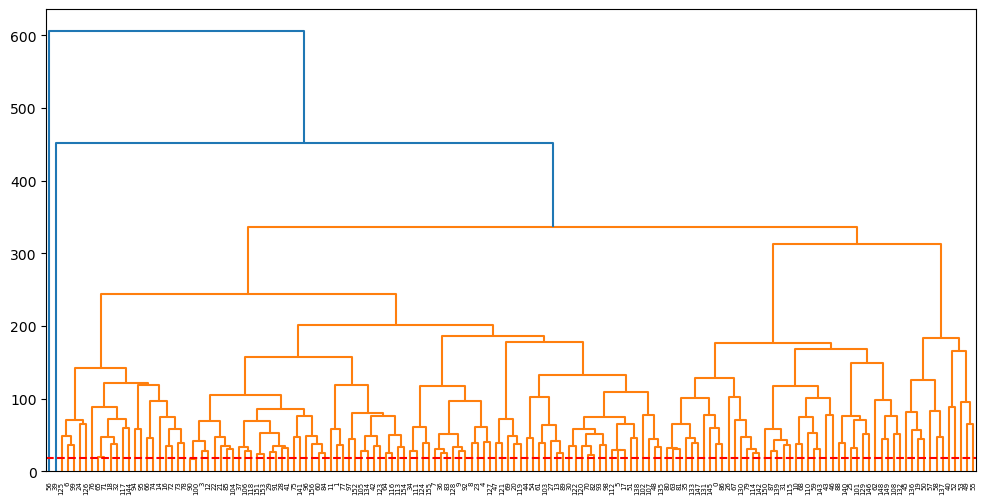

In [40]:
x=data
plt.figure(figsize=(12,6))
sch.dendrogram(sch.linkage(x,'complete'),labels=data.index)
plt.axhline(y=18,color='red',linestyle='--')

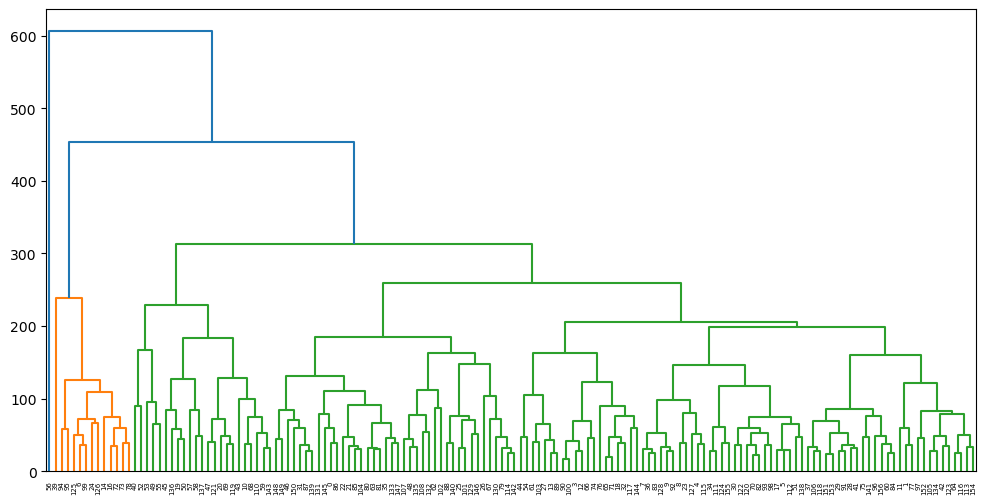

In [36]:
x=data
plt.figure(figsize=(12,6))
sch.dendrogram(sch.linkage(x,'complete'),labels=data.index)
plt.show()

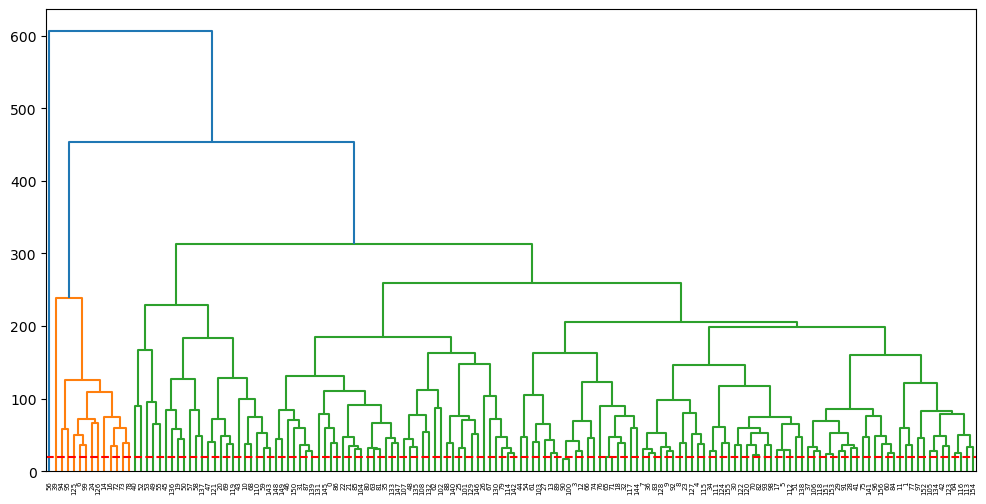

In [44]:
x=data
plt.figure(figsize=(12,6))
sch.dendrogram(sch.linkage(x,'complete'),labels=data.index)
plt.axhline(y=19,color='red',linestyle='--')
plt.show()

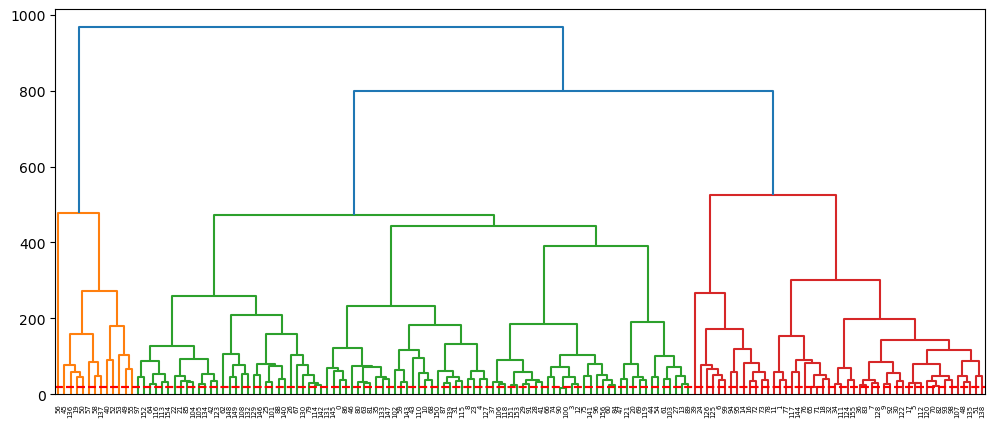

In [37]:
x=data
plt.figure(figsize=(12,5))
sch.dendrogram(sch.linkage(x,method='ward'),labels=data.index)
plt.axhline(y=18,color='red',linestyle='--')
plt.axhline(y=18,color='red',linestyle='--')  
plt.show()

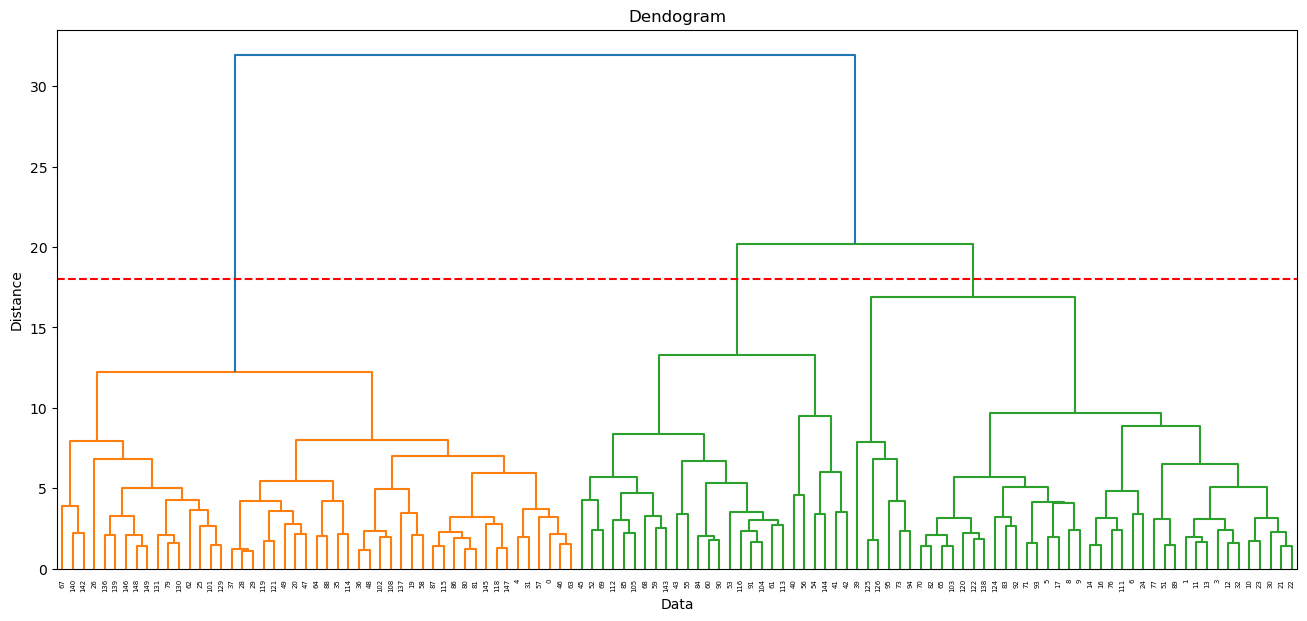

In [55]:
x=X
plt.figure(figsize=(16,7))
sch.dendrogram(sch.linkage(x,method='ward'),labels=car_df.index)
plt.axhline(y=18,color='red',linestyle='--')  # here we are ushing 18 because by silhouette method we are getting best K value is 3=0.22984933786663322 hence we have to cut 3 lines and for that we have choose 18 as its cutting the 3 lines
plt.title('Dendogram')
plt.xlabel('Data')
plt.ylabel('Distance')
plt.show()

# Task 3

In [50]:
from sklearn.metrics import silhouette_score
for k in range(2,8):
    for i in ['single','complete','average','ward']:
        hc=AgglomerativeClustering(n_clusters=k)
        y_hc=hc.fit_predict(X)
        print(k,i,silhouette_score(X,y_hc))

2 single 0.22325584682346977
2 complete 0.22325584682346977
2 average 0.22325584682346977
2 ward 0.22325584682346977
3 single 0.22984933786663322
3 complete 0.22984933786663322
3 average 0.22984933786663322
3 ward 0.22984933786663322
4 single 0.21275492946127036
4 complete 0.21275492946127036
4 average 0.21275492946127036
4 ward 0.21275492946127036
5 single 0.22041817822889512
5 complete 0.22041817822889512
5 average 0.22041817822889512
5 ward 0.22041817822889512
6 single 0.16480347550626964
6 complete 0.16480347550626964
6 average 0.16480347550626964
6 ward 0.16480347550626964
7 single 0.13881938532406607
7 complete 0.13881938532406607
7 average 0.13881938532406607
7 ward 0.13881938532406607


As per various Linkage we found the cluster 3 is good it has high silhouette Score

# Task 4

In [25]:
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [33]:
X=car_df.to_numpy()

In [60]:
def hier(n=3,affinity='manhattan',linkage='complete',grid=False,column1=0,column2=1):
    model1=AgglomerativeClustering(n_clusters=n,affinity=affinity,linkage=linkage)
    y_pred=model1.fit_predict(X)
    colors = plt.cm.Spectral(np.linspace(0, 1,n))
    print('The Silhoutee Score is ',(silhouette_score(X,y_pred)))
    for i,c  in zip(np.unique(y_pred),colors):
        plt.scatter(X[y_pred==i,column1],X[y_pred==i,column2],color=c)
        plt.tight_layout()
    
    plt.grid(grid)
    plt.show()

In [61]:
import ipywidgets
ipywidgets.interact(hier,n=(3,5,1),column1=(0,12,1),column2=(0,12,1),linkage=['ward','complete','single','average'],grid=False,affinity=['euclidean','l1','l2','manhattan','cosine','precomputed'])

interactive(children=(IntSlider(value=3, description='n', max=5, min=3), Dropdown(description='affinity', inde…

<function __main__.hier(n=3, affinity='manhattan', linkage='complete', grid=False, column1=0, column2=1)>